### Atividade

Para resolver as questões abaixo utilizar o dataset [Titanic](https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv).

In [ ]:
#Importando as bibliotecas
import pandas as pd
import seaborn as sns

In [ ]:
#Importando o dataset
titanic = sns.load_dataset('titanic')

In [ ]:
#Visualizando o dataset
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [ ]:
#Verificando os dados nulos
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### Questão 1

Criar um gráfico com a biblioteca Pandas que mostre a quantidade de pessoas por cidade de embarque, coluna embark_town no dataset.

In [ ]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

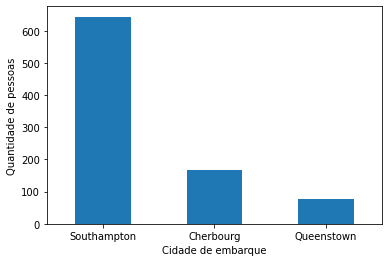

In [ ]:
df = titanic['embark_town'].value_counts()
ax = df.plot(kind = 'bar', xlabel = 'Cidade de embarque', ylabel = 'Quantidade de pessoas', rot=0)

#### Questão 2

Criar um gráfico com a biblioteca Pandas que mostre a quantidade de pessoas por cidade de embarque, coluna embark_town no dataset separados pelo sexo, coluna sex no dataset.

In [ ]:
teste = titanic[['embark_town', 'sex']].value_counts()
teste

embark_town  sex   
Southampton  male      441
             female    203
Cherbourg    male       95
             female     73
Queenstown   male       41
             female     36
dtype: int64

In [ ]:
#manipulando o dataset
titanic1 = pd.get_dummies(titanic, columns=['sex'])
titanic1.groupby('embark_town')[['sex_male', 'sex_female']].sum()

,sex_male,sex_female
embark_town,,
Cherbourg,95.0,73.0
Queenstown,41.0,36.0
Southampton,441.0,203.0


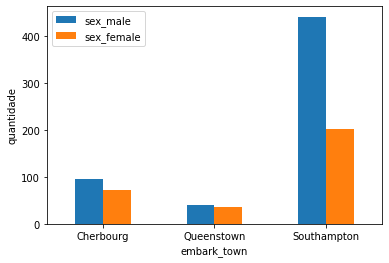

In [ ]:
#plotando o gráfico
titanic1.groupby('embark_town')[['sex_male', 'sex_female']].sum().plot(kind = 'bar', rot = 0, ylabel = 'quantidade')

#### Questão 3

Criar um gráfico com a biblioteca Pandas que mostre o percentual pelo sexo das pessoas no Titanic.

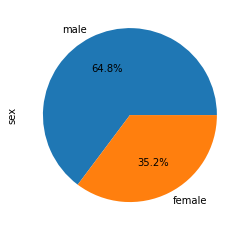

In [ ]:
titanic['sex'].value_counts().plot(kind = 'pie', autopct = '%.1f%%');

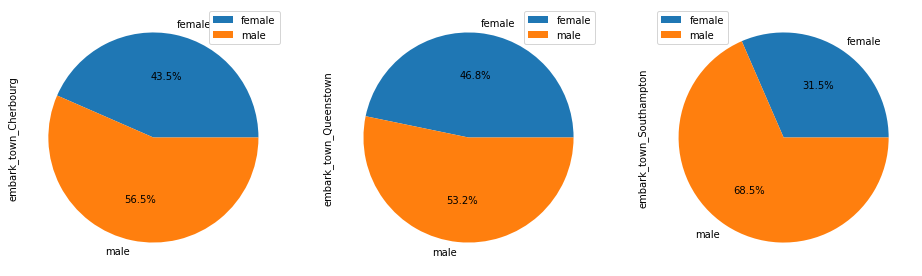

In [ ]:
pd.get_dummies(titanic, columns=['embark_town']) \
  .groupby('sex')[['embark_town_Cherbourg', 'embark_town_Queenstown', 'embark_town_Southampton']] \
  .sum() \
  .plot.pie(autopct='%.1f%%', subplots=True, figsize=(16,6));

#### Questão 4

Criar um gráfico com a biblioteca Pandas que mostre os outliers da idade das pessoas no Titanic, coluna age no dataset.

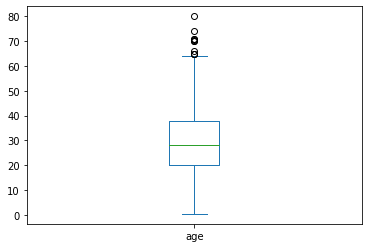

In [ ]:
titanic['age'].plot(kind = 'box')

#### Questão 5

Criar um gráfico com a biblioteca Pandas que mostre os outliers da tarifa de embarque das pessoas no Titanic, coluna fare no dataset.

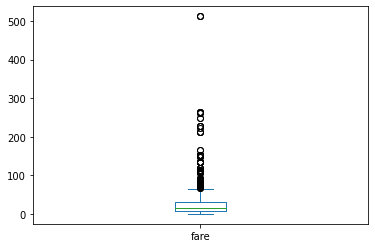

In [ ]:
titanic['fare'].plot(kind = 'box')

#### Questão 6

Criar um gráfico com a biblioteca Pandas que mostre a distribuição de idades das pessoas no Titanic, coluna age no dataset.

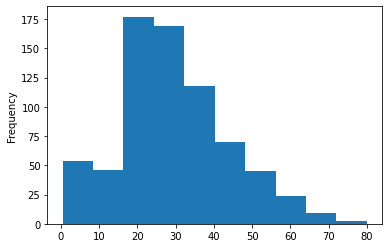

In [ ]:
titanic['age'].plot(kind = 'hist', xlabel = 'idade')

#### Questão 7

Criar um gráfico com a biblioteca Pandas que mostre a distribuição de idades das pessoas no Titanic, coluna age no dataset separados por sexo em dois gráficos.

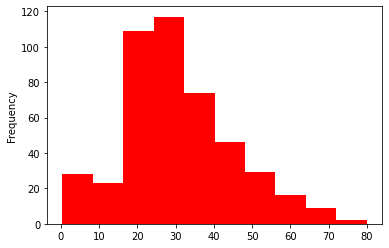

In [ ]:
titanic[titanic['sex'] == 'male']['age'].plot(kind = 'hist', color = 'r')

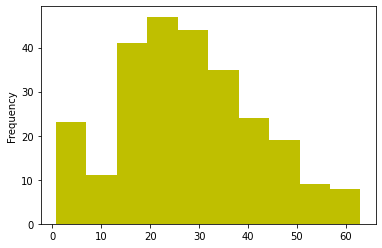

In [ ]:
titanic[titanic['sex'] == 'female']['age'].plot(kind = 'hist', color = 'y')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f36d77ecb90>,
      dtype=object)

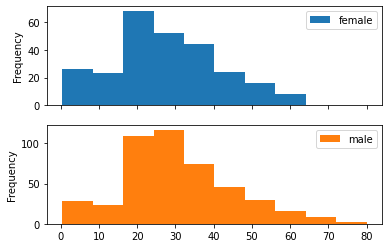

In [ ]:
titanic[['sex', 'age']].reset_index().pivot('index', 'sex', 'age').plot(kind = 'hist', subplots = True)